# Homework - Linear Regression (9 pts)

1. (3 pts) For the diabetes dataset in `diabetes.csv` (in linear regression lecture folder), compute the weights (i.e., slopes) for each feature in a linear model that predicts diabetes progression based on the other 10 features after the features have been standardized. 

In [1]:
import pandas as pd
df = pd.read_csv('diabetes.csv')
df.head()

,AGE,SEX,BMI,BP,TC,LDL,HDL,TCH,LTG,GLU,DIS
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [2]:
from sklearn.linear_model import LinearRegression

X = df.loc[:,'AGE':'GLU'].to_numpy()
y = df['DIS'].to_numpy()

Xs = (X - X.mean(axis=0)) / X.std(axis=0)

model = LinearRegression()
model.fit(Xs, y)

model.intercept_, model.coef_

(152.1334841628959,
 array([ -0.47612079, -11.40686692,  24.72654886,  15.42940413,
        -37.67995261,  22.67616277,   4.80613814,   8.42203936,
         35.73444577,   3.21667372]))

2. (3 pts) Use bootstrap to estimate 95% confidence intervals for each weight in the model from #1 above. Include the model's bias (i.e., y-intercept) in the list of weights.

In [3]:
import numpy as np
num_bs = 1000
bs_weights = np.zeros([num_bs, 11])
bs_model = LinearRegression()
for i in range(num_bs):
    ind = np.random.choice(np.arange(len(y)), size=len(y), replace=True)
    bs_X = Xs[ind]
    bs_y = y[ind]
    bs_model.fit(bs_X, bs_y)
    bs_weights[i,0] = bs_model.intercept_
    bs_weights[i,1:] = bs_model.coef_

weights_ci = np.quantile(bs_weights, [0.025, 0.975], axis=0)
weights_ci.shape

(2, 11)

3. (3 pts) For the liner model from #1-2 above, make bar plot of the model weights (exclude y-intercept) with errorbars indicating the 95% confidence limits.

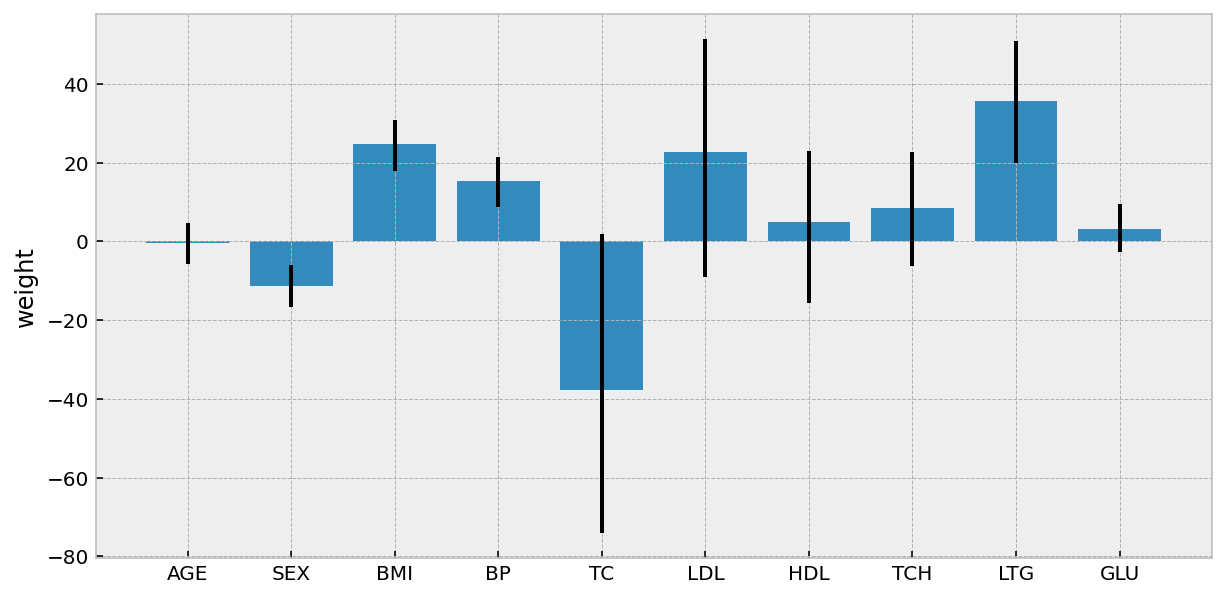

In [4]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('bmh')

coef_yerr = np.abs(weights_ci[:,1:] - model.coef_)

plt.figure(figsize=[10,5])
plt.bar(range(10), model.coef_)
plt.errorbar(range(10), model.coef_, yerr=coef_yerr, ls='', color='k')
plt.xticks(range(10), df.columns.values[:-1])
plt.ylabel('weight');